# KMeans Clustering

### Importing necessary packages and preprocessing of data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score


In [7]:
train = pd.read_csv('train_data_z.csv')
test = pd.read_csv('test_data_z.csv')
train_target = pd.read_csv('train_target.csv')
test_target = pd.read_csv('test_target.csv')

FileNotFoundError: ignored

In [ ]:
train_names = list(train.columns)
del train_names[0]


In [ ]:
train_names

In [ ]:
test.head

In [ ]:
test = test.drop(columns=['Unnamed: 0'])
test

NameError: ignored

In [ ]:
train = train.drop(columns=['Unnamed: 0'])
train

NameError: ignored

In [ ]:
train_target = train_target.drop(columns=['Unnamed: 0'])
train_target

NameError: ignored

In [ ]:
test_target = test_target.drop(columns=['Unnamed: 0'])
train_target

,price_range
0,0
1,1
2,3
3,2
4,2
...,...
1595,3
1596,2
1597,0
1598,0


In [ ]:
test_target

,price_range
0,2
1,0
2,3
3,0
4,0
...,...
395,1
396,0
397,2
398,3


In [ ]:
train.shape

(1600, 15)

In [ ]:
test.shape

(400, 15)

In [ ]:
train_target.shape

(1600, 1)

In [ ]:
test_target.shape

(400, 1)

### Determining the number of clusters

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(train)
    kmeanModel.fit(train)
 
    distortions.append(sum(np.min(cdist(train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / train.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / train.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.0864767552840469
2 : 0.5960822640888189
3 : 0.4254310465834063
4 : 0.33384025015258734
5 : 0.26939848286562446
6 : 0.23819217642590157
7 : 0.210931788435421
8 : 0.19537512188762918
9 : 0.18083828707500252


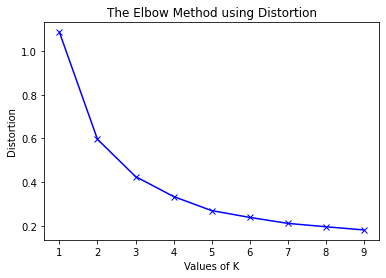

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2629.617991743854
2 : 763.1539809416292
3 : 382.9118254043942
4 : 230.2316488125224
5 : 154.41458440549602
6 : 115.42991696169804
7 : 92.58772286606204
8 : 78.81481911687933
9 : 67.60849695630442


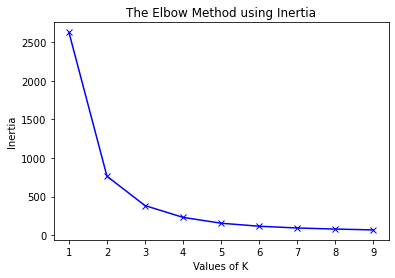

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Elbow method to determine number of clusters
### The first plot shows the distortion of the data, or the average of the squared distances from the cluster centers to the points of the cluster. The second plot shows the inertia, or the sum of the squared distances from each point to their cluster center. This seems to indicate that 3 to 5 clusters would be the ideal number of clusters to have for this dataset. I will test our data with 3, 4 and 5 clusters to determine the best fit for our dataset

## 3 Clusters

#### Training Data

In [ ]:
train_kmeans = KMeans(n_clusters=3, max_iter=500, verbose=0, n_init=5) # initialization
train_kmeans.fit(train)

KMeans(max_iter=500, n_clusters=3, n_init=5)

In [ ]:
cluster = train_kmeans.predict(train)

In [ ]:
cluster

array([1, 1, 2, ..., 0, 0, 1], dtype=int32)

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,1
1,1
2,2
3,2
4,0
...,...
1595,2
1596,0
1597,0
1598,0


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.12,-0.42,-0.41,-0.42,-0.41,-0.42,-0.35,-0.42,-0.13,-0.41,-0.40,2.87,-0.39,-0.42,-0.42
1,3.27,-0.40,-0.40,-0.40,-0.39,-0.40,-0.32,-0.40,-0.00,-0.39,-0.38,1.42,-0.38,-0.40,-0.40
2,0.99,-0.37,-0.37,-0.37,-0.36,-0.37,-0.32,-0.37,-0.17,-0.36,-0.35,3.50,-0.35,-0.37,-0.37


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(train[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  548
Size of Cluster 1 =  332
Size of Cluster 2 =  720


In [ ]:
trainNP = train_target.values.flatten()


In [ ]:
print(completeness_score(trainNP,cluster))

0.2532469152259576


In [ ]:
print(homogeneity_score(trainNP,cluster))

0.19231205267728013


In [ ]:
from sklearn import metrics

In [ ]:
phone_silhouettes = metrics.silhouette_samples(train, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[0.69668044 0.68947571 0.61766864 0.7298689  0.5963806  0.66372722
 0.70983079 0.65115594 0.738807   0.40994549 0.68396471 0.51554447
 0.68487344 0.63609258 0.02066163 0.13036501 0.66053911 0.03477571
 0.5137223  0.62653069]

 Mean Silhouette Value:  0.542964082987697


In [ ]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

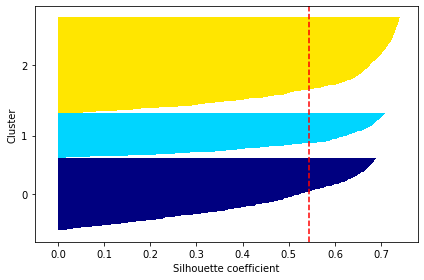

In [ ]:
plot_silhouettes(train, cluster)

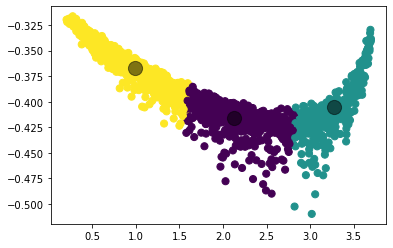

In [ ]:
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 3 cluster training set summary

#### The completeness score for the training set with 3 clusters is 0.25, meaning many points with the same class were placed in different clusters. The homogeneity score is 0.19  meaning that there are many terms from different classes placed in the same clusters. 

#### The Mean Silhouette Value is 0.54. Silhouette values show how similar points are to other points in their clusters and how dissimilar they are to points in different clusters. A mean value of 0.54 may indicate that the different clusters are close together.

## 3 Clusters

#### Testing Data

In [ ]:
cluster = train_kmeans.predict(test)

In [ ]:
cluster

array([2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2,
       2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1,

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,2
1,1
2,2
3,1
4,0
...,...
395,2
396,2
397,0
398,0


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.12,-0.42,-0.41,-0.42,-0.41,-0.42,-0.35,-0.42,-0.13,-0.41,-0.40,2.87,-0.39,-0.42,-0.42
1,3.27,-0.40,-0.40,-0.40,-0.39,-0.40,-0.32,-0.40,-0.00,-0.39,-0.38,1.42,-0.38,-0.40,-0.40
2,0.99,-0.37,-0.37,-0.37,-0.36,-0.37,-0.32,-0.37,-0.17,-0.36,-0.35,3.50,-0.35,-0.37,-0.37


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(test[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  120
Size of Cluster 1 =  84
Size of Cluster 2 =  196


In [ ]:
testNP = test_target.values.flatten()


In [ ]:
print(completeness_score(testNP,cluster))

0.2588580244611112


In [ ]:
print(homogeneity_score(testNP,cluster))

0.1942077481261714


In [ ]:
phone_silhouettes = metrics.silhouette_samples(test, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[0.67927028 0.55880108 0.73923122 0.6488529  0.59054712 0.48403924
 0.65071227 0.6329922  0.62208829 0.74347376 0.73447713 0.69236747
 0.72018499 0.63310019 0.53798031 0.68000124 0.62840735 0.66971554
 0.55887048 0.73169623]

 Mean Silhouette Value:  0.542868530960254


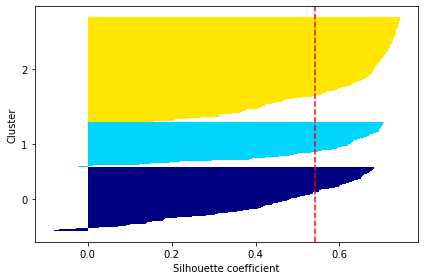

In [ ]:
plot_silhouettes(test, cluster)

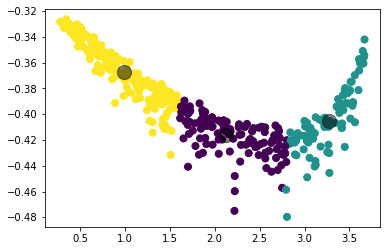

In [ ]:
plt.scatter(test.iloc[:, 0], test.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 3 cluster testing set summary

#### The completeness score for 3 clusters with the training set is 0.26, which is slightly higher than the completeness score for the training set. This shows that there is a slightly higher rate of points from the same classes being grouped in the same cluster. The homogeneity score is 0.19, which is about the same as the training set. This result is somewhat predictable because we have a smaller number of clusters than classes.

#### The Mean Silhouette Value is 0.54, this is the same as the Mean Silhouette Value as the training set. Silhouette values show how similar points are to other points in their clusters and how dissimilar they are to points in different clusters. A mean value of 0.54 may indicate that the different clusters are close together.

## 4 Clusters

#### Training Data

In [ ]:
train_kmeans = KMeans(n_clusters=4, max_iter=500, verbose=0, n_init=5) # initialization
train_kmeans.fit(train)

KMeans(max_iter=500, n_clusters=4, n_init=5)

In [ ]:
cluster = train_kmeans.predict(train)
cluster

array([2, 2, 1, ..., 3, 3, 2], dtype=int32)

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,2
1,2
2,1
3,1
4,0
...,...
1595,1
1596,3
1597,3
1598,3


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.70,-0.43,-0.42,-0.43,-0.42,-0.43,-0.35,-0.43,-0.07,-0.42,-0.40,2.34,-0.40,-0.43,-0.43
1,0.83,-0.36,-0.36,-0.36,-0.35,-0.36,-0.31,-0.36,-0.17,-0.35,-0.35,3.56,-0.34,-0.36,-0.36
2,3.43,-0.39,-0.39,-0.39,-0.38,-0.39,-0.30,-0.39,0.02,-0.38,-0.37,1.12,-0.37,-0.39,-0.39
3,1.74,-0.40,-0.40,-0.40,-0.40,-0.40,-0.35,-0.40,-0.16,-0.40,-0.39,3.16,-0.38,-0.40,-0.40


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(train[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  304
Size of Cluster 1 =  529
Size of Cluster 2 =  219
Size of Cluster 3 =  548


In [ ]:
print(completeness_score(trainNP,cluster))

0.2216682062042314


In [ ]:
print(homogeneity_score(trainNP,cluster))

0.21119185778790053


In [ ]:
phone_silhouettes = metrics.silhouette_samples(train, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[0.70661105 0.66188765 0.6154573  0.72899008 0.49025242 0.38190048
 0.62641227 0.65720932 0.69288125 0.34114375 0.20175357 0.43589616
 0.215226   0.63794303 0.61488348 0.63973121 0.66880951 0.61344158
 0.58086341 0.55248314]

 Mean Silhouette Value:  0.5202028539409465


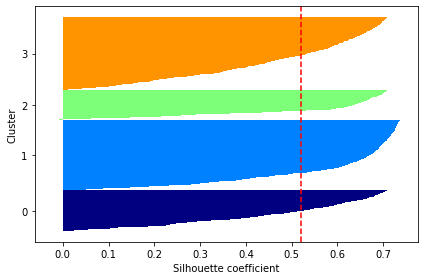

In [ ]:
plot_silhouettes(train, cluster)

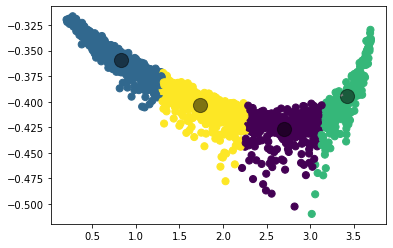

In [ ]:
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 4 cluster training data summary

#### The completeness score is 0.22, the homogeneity score is 0.21. The completeness score is slightly lower than the completeness score for 3 clusters showing that there are more instances of points from the same class belonging to different clusters. The homogeneity score is slightly higher for 3 clusters showing that the rate of clusters containing points from the same class is slightly higher

#### The Mean Silhouette Value is 0.52, this is a little lower than the value for 3 clusters. This indicates that there is a bigger difference between the values of points within a cluster, or less of a difference between points in different clusters.

## 4 Clusters

#### Testing Data

In [ ]:
cluster = train_kmeans.predict(test)
cluster

array([1, 2, 1, 2, 3, 3, 1, 2, 3, 1, 1, 1, 1, 3, 0, 1, 2, 3, 3, 1, 1, 2,
       2, 3, 1, 1, 0, 0, 2, 3, 1, 3, 3, 2, 1, 3, 0, 0, 1, 0, 3, 1, 1, 0,
       2, 3, 0, 1, 3, 3, 0, 2, 0, 3, 0, 3, 1, 0, 3, 1, 1, 1, 0, 1, 3, 1,
       1, 0, 1, 3, 0, 1, 2, 2, 3, 1, 1, 0, 0, 0, 3, 2, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 0, 3, 1, 0, 3, 3, 1, 3, 0, 0, 0, 0, 1, 3, 1, 0, 0, 3,
       1, 0, 1, 3, 0, 0, 3, 1, 0, 3, 1, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 0, 3, 2, 3, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3,
       2, 1, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3,
       0, 0, 1, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 0, 1, 3,
       0, 3, 3, 0, 3, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 3, 2, 3, 3, 1, 3, 3,
       1, 1, 3, 2, 3, 3, 0, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 3, 0, 1, 1, 3, 1, 3, 3, 1, 3,
       1, 0, 3, 1, 2, 0, 0, 3, 2, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 2,
       3, 3, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2,

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,1
1,2
2,1
3,2
4,3
...,...
395,1
396,3
397,0
398,3


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.70,-0.43,-0.42,-0.43,-0.42,-0.43,-0.35,-0.43,-0.07,-0.42,-0.40,2.34,-0.40,-0.43,-0.43
1,0.83,-0.36,-0.36,-0.36,-0.35,-0.36,-0.31,-0.36,-0.17,-0.35,-0.35,3.56,-0.34,-0.36,-0.36
2,3.43,-0.39,-0.39,-0.39,-0.38,-0.39,-0.30,-0.39,0.02,-0.38,-0.37,1.12,-0.37,-0.39,-0.39
3,1.74,-0.40,-0.40,-0.40,-0.40,-0.40,-0.35,-0.40,-0.16,-0.40,-0.39,3.16,-0.38,-0.40,-0.40


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(test[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  83
Size of Cluster 1 =  133
Size of Cluster 2 =  53
Size of Cluster 3 =  131


In [ ]:
print(completeness_score(testNP,cluster))

0.22189091585011347


In [ ]:
print(homogeneity_score(testNP,cluster))

0.21253790748671886


In [ ]:
phone_silhouettes = metrics.silhouette_samples(test, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[ 0.30221295  0.01324671  0.67951179  0.46810944  0.44984224  0.62595396
  0.64974794  0.23295663  0.40915597  0.71579954  0.61221689  0.70399033
  0.71338133  0.40369227  0.58478147  0.2724536   0.66840792 -0.02891201
  0.58206478  0.72644239]

 Mean Silhouette Value:  0.5285025793890288


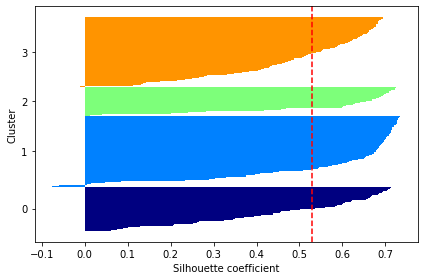

In [ ]:
plot_silhouettes(test, cluster)

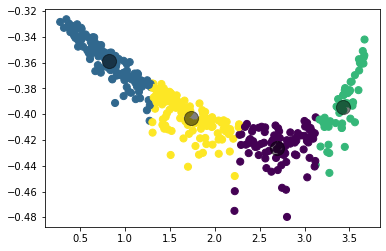

In [ ]:
plt.scatter(test.iloc[:, 0], test.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 4 cluster testing data summary

#### The completeness score is 0.22, the homogeneity score is 0.21. Thes scores are the same for the 4 cluster training data. The completeness score is slightly lower than the completeness score for 3 clusters showing that there are more instances of points from the same class belonging to different clusters. The homogeneity score is slightly higher for 3 clusters showing that the rate of clusters containing points from the same class is slightly higher

#### The Mean Silhouette score is 0.52, this is the same as the score for the training data with 4 clusters, but lower than the Silhouette score with 3 clusters. This shows that there are points more closely located to points from other clusters. 

## 5 Clusters

#### Training Data

In [ ]:
train_kmeans = KMeans(n_clusters=5, max_iter=500, verbose=0, n_init=5) # initialization
train_kmeans.fit(train)

KMeans(max_iter=500, n_clusters=5, n_init=5)

In [ ]:
cluster = train_kmeans.predict(train)
cluster

array([1, 1, 4, ..., 0, 2, 1], dtype=int32)

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,1
1,1
2,4
3,4
4,0
...,...
1595,4
1596,0
1597,0
1598,2


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.09,-0.42,-0.41,-0.42,-0.41,-0.42,-0.35,-0.42,-0.13,-0.41,-0.40,2.92,-0.40,-0.42,-0.42
1,3.49,-0.39,-0.38,-0.39,-0.38,-0.39,-0.30,-0.39,0.01,-0.38,-0.36,0.98,-0.36,-0.39,-0.39
2,1.39,-0.39,-0.39,-0.39,-0.38,-0.39,-0.34,-0.39,-0.18,-0.38,-0.37,3.36,-0.37,-0.39,-0.39
3,2.88,-0.43,-0.42,-0.43,-0.42,-0.43,-0.34,-0.43,-0.04,-0.42,-0.40,2.11,-0.40,-0.43,-0.43
4,0.68,-0.35,-0.35,-0.35,-0.35,-0.35,-0.31,-0.35,-0.16,-0.35,-0.34,3.61,-0.34,-0.35,-0.35


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(train[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  354
Size of Cluster 1 =  177
Size of Cluster 2 =  441
Size of Cluster 3 =  259
Size of Cluster 4 =  369


In [ ]:
print(completeness_score(trainNP,cluster))

0.1994870819232796


In [ ]:
print(homogeneity_score(trainNP,cluster))

0.22530827203290155


In [ ]:
phone_silhouettes = metrics.silhouette_samples(train, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[0.70887152 0.63119697 0.61519299 0.68435084 0.20286332 0.46738701
 0.30282726 0.66859756 0.46628534 0.71897346 0.6789912  0.42774551
 0.68174398 0.64326168 0.50174053 0.65817569 0.68324625 0.48514477
 0.07786376 0.60624214]

 Mean Silhouette Value:  0.5075961018284387


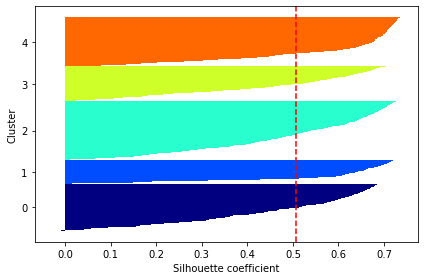

In [ ]:
plot_silhouettes(train, cluster)

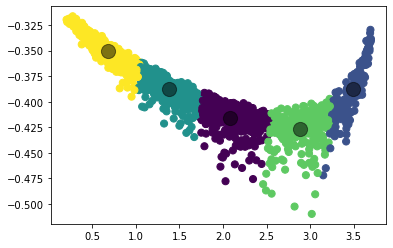

In [ ]:
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 5 Cluster training data summary 

#### The completeness score is 0.19 and the homogeneity score is 0.23. The completeness score is lower than the completeness score with 4 clusters. This is likely because there are more clusters than classes, and so more points from the same class are split into different clusters. The homogeneity score is slightly higher than the score with 4 clusters. This may be due to the extra cluster containing more points from the same class

#### The Mean Silhouette Value is 0.51. This is slightly lower than the Mean Silhouette Value with 4 clusters.

## 5 Clusters

#### Testing Data

In [ ]:
cluster = train_kmeans.predict(test)
cluster

array([2, 3, 4, 1, 0, 0, 4, 3, 0, 4, 4, 4, 4, 0, 3, 2, 1, 0, 0, 4, 4, 1,
       1, 2, 4, 2, 3, 0, 1, 2, 2, 2, 2, 1, 4, 0, 3, 3, 4, 3, 2, 4, 4, 3,
       1, 0, 3, 2, 0, 0, 3, 1, 3, 2, 0, 0, 4, 3, 0, 4, 4, 4, 3, 4, 2, 2,
       2, 0, 4, 0, 3, 4, 1, 1, 2, 4, 4, 0, 3, 0, 0, 1, 4, 0, 2, 4, 3, 4,
       4, 4, 4, 2, 3, 2, 4, 3, 2, 2, 2, 0, 3, 3, 0, 3, 4, 0, 2, 0, 0, 2,
       4, 0, 4, 0, 3, 3, 2, 4, 3, 2, 2, 4, 1, 2, 0, 4, 1, 2, 1, 2, 4, 0,
       2, 4, 0, 2, 4, 4, 4, 2, 3, 2, 1, 2, 3, 3, 3, 0, 0, 3, 2, 0, 3, 2,
       1, 2, 1, 4, 4, 0, 2, 1, 0, 1, 4, 1, 2, 1, 4, 4, 0, 2, 2, 4, 2, 2,
       0, 3, 4, 2, 4, 3, 1, 2, 3, 2, 2, 2, 2, 2, 4, 2, 0, 4, 2, 3, 4, 2,
       3, 2, 2, 0, 2, 3, 1, 2, 0, 3, 3, 2, 4, 4, 1, 2, 3, 2, 2, 2, 0, 2,
       2, 4, 2, 3, 0, 0, 3, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 3, 2, 2, 3, 4,
       4, 0, 3, 3, 3, 3, 1, 3, 2, 0, 1, 4, 2, 0, 4, 2, 0, 4, 2, 2, 4, 2,
       4, 3, 0, 4, 3, 3, 3, 0, 1, 0, 0, 4, 2, 2, 0, 4, 2, 1, 0, 2, 1, 1,
       2, 0, 3, 3, 4, 1, 1, 1, 3, 4, 4, 4, 4, 3, 1,

In [ ]:
clusters = pd.DataFrame(cluster, columns=['Cluster'])
clusters

,Cluster
0,2
1,3
2,4
3,1
4,0
...,...
395,4
396,2
397,0
398,0


In [ ]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(train_kmeans.cluster_centers_, columns=train_names)
centroids

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,2.09,-0.42,-0.41,-0.42,-0.41,-0.42,-0.35,-0.42,-0.13,-0.41,-0.40,2.92,-0.40,-0.42,-0.42
1,3.49,-0.39,-0.38,-0.39,-0.38,-0.39,-0.30,-0.39,0.01,-0.38,-0.36,0.98,-0.36,-0.39,-0.39
2,1.39,-0.39,-0.39,-0.39,-0.38,-0.39,-0.34,-0.39,-0.18,-0.38,-0.37,3.36,-0.37,-0.39,-0.39
3,2.88,-0.43,-0.42,-0.43,-0.42,-0.43,-0.34,-0.43,-0.04,-0.42,-0.40,2.11,-0.40,-0.43,-0.43
4,0.68,-0.35,-0.35,-0.35,-0.35,-0.35,-0.31,-0.35,-0.16,-0.35,-0.34,3.61,-0.34,-0.35,-0.35


In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(test[clusters == c])
    return size

In [ ]:
size = cluster_sizes(cluster)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  74
Size of Cluster 1 =  45
Size of Cluster 2 =  116
Size of Cluster 3 =  68
Size of Cluster 4 =  97


In [ ]:
print(completeness_score(testNP,cluster))

0.21784679065867185


In [ ]:
print(homogeneity_score(testNP,cluster))

0.24579362986601344


In [ ]:
phone_silhouettes = metrics.silhouette_samples(test, cluster)
print(phone_silhouettes[:20])
print("\n Mean Silhouette Value: ", phone_silhouettes.mean())

[0.41193196 0.30581541 0.51121215 0.28848584 0.5839756  0.41885384
 0.66349619 0.15680107 0.63341766 0.62476459 0.25975583 0.72779932
 0.69110585 0.65126191 0.05406706 0.46924749 0.67658501 0.62229979
 0.54970565 0.69850211]

 Mean Silhouette Value:  0.5228619166945079


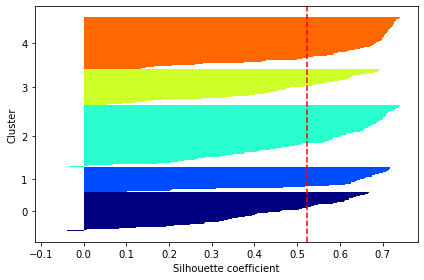

In [ ]:
plot_silhouettes(test, cluster)

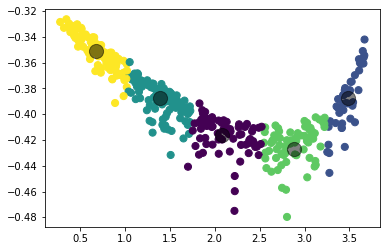

In [ ]:
plt.scatter(test.iloc[:, 0], test.iloc[:, 1], c=cluster, s=50, cmap='viridis')

centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 5 cluster testing data summary

#### The completeness score is 0.22 the homogeneity score is 0.25. Both of these scores are higher than the scores from the training set with 5 clusters. The completeness score is the same as the completeness score with 4 clusters, and the homogeneity score is higher than the homogeneity score with 4 clusters. This shows that the rate of points of a class belonging to the same cluster is about the same and the rate of a cluster containing points from one class is higher with 5 clusters. 

#### The Mean Silhouette Value is 0.52. This is about the same as the Mean Silhouette Value for the kMeans cluster with 4 clusters. This shows that the distance between points of the same cluster and points from different clusters are about the same. 

## Clustering Summary 

#### For the 3 kMeans clustering methods I used, with 3, 4 and 5 as values of k, I concluded the following. The completeness and Mean Silhouette Value was highest with 3 clusters, however the homogeneity score was the lowest. When there were 5 clusters, the homogeneity score was the highest. I believe that the highest completeness score was seen with 3 neighbors because it is more likely that many points from one of the four classes would be clustered together. I think that the homogeneity score was highest with 5 neighbors because once we have more clusters than classes, it becomes more likely that clusters will contain points from certain classes. 

#### Overall, clustering using kMeans did not seem like the most effective method. It could due to points being highly concentrated, low variance among variables and due to a few outliers that appear near the bottom of the cluster graphs seen above. 